In [104]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

#Locating Data
import os 

MJ_Stats_Path = os.path.join("Resources", "MJ-Stats.csv")
Shaq_Stats_Path = os.path.join("Resources", "Shaq-Stats.csv")

#Reading Data
MJ_Stats = pd.read_csv(MJ_Stats_Path)
Shaq_Stats = pd.read_csv(Shaq_Stats_Path)

#Merge Data
data_df = pd.concat([MJ_Stats, Shaq_Stats])

#Print Stats
print(data_df.head())
print(data_df.shape)

  Player  Game        Date        Age Team  Home Opposition  Win  Difference  \
0     MJ     1  10/26/1984  21.689938  CHI     1        WSB    1          16   
1     MJ     2  10/27/1984  21.692676  CHI     0        MIL    0          -2   
2     MJ     3  10/29/1984  21.698152  CHI     1        MIL    1           6   
3     MJ     4  10/30/1984  21.700890  CHI     0        KCK    1           5   
4     MJ     5   11/1/1984  21.706366  CHI     0        DEN    0         -16   

   GS  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc  
0   1  ...    1    5    6    7    2    4    5   2   16  12.5  
1   1  ...    3    2    5    5    2    1    3   4   21  19.4  
2   1  ...    2    2    4    5    6    2    3   4   37  32.9  
3   1  ...    2    2    4    5    3    1    6   5   25  14.7  
4   1  ...    3    2    5    5    1    1    2   4   17  13.2  

[5 rows x 30 columns]
(2279, 30)


     Player  Game        Date        Age Team  Home Opposition  Win  \
0        MJ     1  10/26/1984  21.689938  CHI     1        WSB    1   
1        MJ     2  10/27/1984  21.692676  CHI     0        MIL    0   
2        MJ     3  10/29/1984  21.698152  CHI     1        MIL    1   
3        MJ     4  10/30/1984  21.700890  CHI     0        KCK    1   
4        MJ     5   11/1/1984  21.706366  CHI     0        DEN    0   
...     ...   ...         ...        ...  ...   ...        ...  ...   
1067   Shaq  1068    1/2/2009  36.826800  PHO     1        LAC    1   
1068   Shaq  1069    1/9/2009  36.846000  PHO     1        DAL    1   
1069   Shaq  1070   1/11/2009  36.851500  PHO     0        LAC    1   
1070   Shaq  1071   1/13/2009  36.856900  PHO     1        ATL    1   
1071   Shaq  1072   1/16/2009  36.865200  PHO     1        MIN    0   

      Difference  GS  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc  
0             16   1  ...    1    5    6    7    2    4    5   2   16

Text(0, 0.5, 'Number of assists')

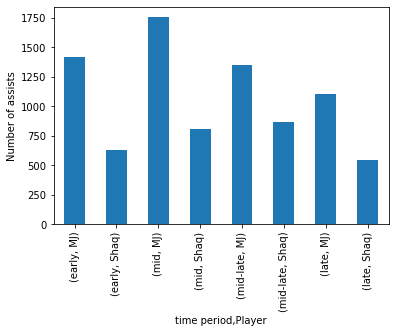

In [105]:
data_df = pd.concat([MJ_Stats, Shaq_Stats.iloc[:1072]])
print(data_df)
df_assists = data_df.groupby('Player')['AST'].sum()
print(df_assists)
buckets = [0, 268, 536, 804, 1073]
bucket_labels = ["early", "mid","mid-late","late"]
data_df['time period'] = pd.cut(data_df['Game'], buckets, labels = bucket_labels)
df_2 = data_df.groupby(['time period', 'Player'])['AST'].sum()
ax = df_2.plot(kind = 'bar')
ax.set_ylabel("Number of assists")


([<matplotlib.patches.Wedge at 0x1b05fb2ffd0>,
 [Text(-0.5425729311378015, 0.9568775336460432, 'MJ assists'),
  Text(0.5425729311378014, -0.9568775336460433, 'Shaq assists')],
 [Text(-0.2959488715297099, 0.521933200170569, '66.4%'),
  Text(0.29594887152970983, -0.5219332001705691, '33.6%')])

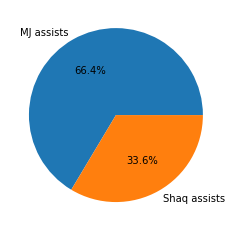

In [106]:
labels = 'MJ assists', 'Shaq assists'
plt.pie(data_df.groupby('Player')['AST'].sum(),labels=labels, autopct='%1.1f%%')